In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [45]:
L = ( lambda x: 0.5*x*(x-1), lambda x: -(x+1)*(x-1), lambda x: 0.5*x*(x+1) )

In [46]:
x = np.linspace(-1,1,100)
F = np.zeros((x.shape[0],3))

In [47]:
for i in range(3):
    F[:,i] = L[i](x)

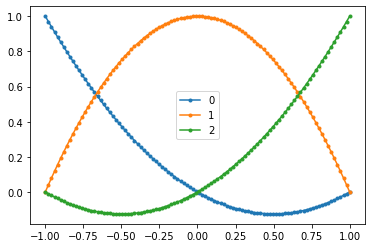

In [48]:
for i in range(3):
    plt.plot(x,F[:,i],'.-',label='{}'.format(i))
plt.legend()

In [68]:
X = np.array([-1,0,1,-2],dtype=np.float64)
Y = np.array([10.,5.,8.,.5],dtype=np.float64)

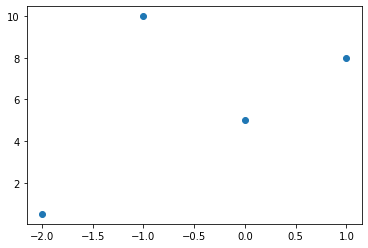

In [69]:
plt.scatter(X,Y)

In [70]:
def Lagrange(x,X,i):
    
    L = 1.
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
            
    return L

In [71]:
def Interpolate(x,X,Y):
    
    Poly = 0.
    
    for i in range(X.shape[0]):
        Poly += Lagrange(x,X,i)*Y[i]
        
    return Poly

In [72]:
x0 = np.linspace(-2,1,100)
y0 = Interpolate(x0,X,Y)

In [73]:
#y1 = np.interp(x0,X,Y)
#y1

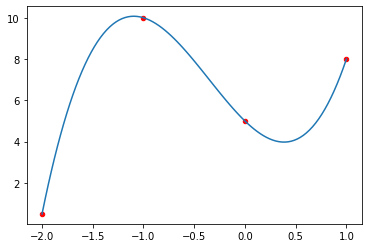

In [74]:
plt.plot(x0,y0)
#plt.plot(x0,y1)
plt.scatter(X,Y,color='r',s=20)

# Sympy

In [77]:
x = sym.Symbol('x',real=True)
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f

3.75*x**3 + 4.0*x**2 - 4.75*x + 5.0

In [80]:
Lagrange(x,X,0)

-1.0*x*(0.5 - 0.5*x)*(1.0*x + 2.0)